## Overview

How much are you likely to trust an online movie review and rating site, considering that the same company also makes money from selling a movie ticket. Would you doubt the credibility of their rating?


### Goal of the Project
There have been speculations about some shardy activities in Fandango’s movie rating site. Several persons have noticed how Fandango's movie rating is significantly different from it's close rivals. Like, most of the times, Fandango's rating was higher than its competitors by clear margin. On the contrary, other movies rating sites have a consistent range of movie rating, which makes it more credibly relatable.

This project is poised at unlocking the severals reasons why fandango movie rating data is outrightly different from its counterparts. Could there be any dubious manipulations with the user data? or perhaps the users find their movies to be more interesting than others? We still can't say. Lets find out!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Blaise Hilary\\Documents'

In [3]:
os.chdir('C:\\Users\\Blaise Hilary\\Downloads')

In [4]:
pwd

'C:\\Users\\Blaise Hilary\\Downloads'

In [5]:
fandango = pd.read_csv("fandango_scrape.csv")

In [6]:
fandango.head(10)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055


In [7]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [8]:
fandango.mean()

STARS        3.558532
RATING       3.375794
VOTES     1147.863095
dtype: float64

In [9]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Let explore the relationship between user votes and rating

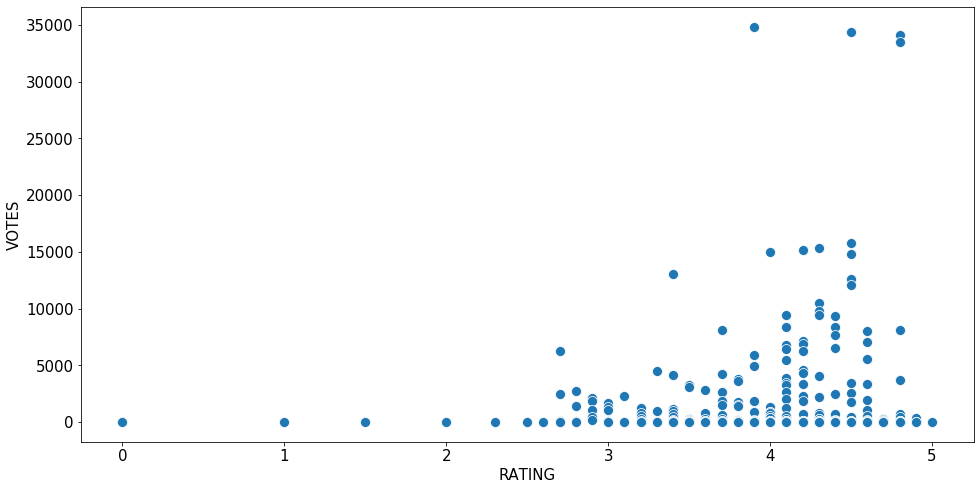

In [10]:
plt.figure(figsize = (16,8))
sns.scatterplot(x= 'RATING', y = 'VOTES', data = fandango, ci = 95, s = 100 )
plt.xlabel("RATING", fontsize = 15)
plt.ylabel("VOTES", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [11]:
## Calculate the correlations between the columns
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [12]:
from datetime import datetime

In [13]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1])

In [14]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)


In [15]:
fandango['YEAR'] = fandango['YEAR'].apply(lambda year: year.split(')')[0])

In [16]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [17]:
## How many movies are in the Fandango DataFrame per year?
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

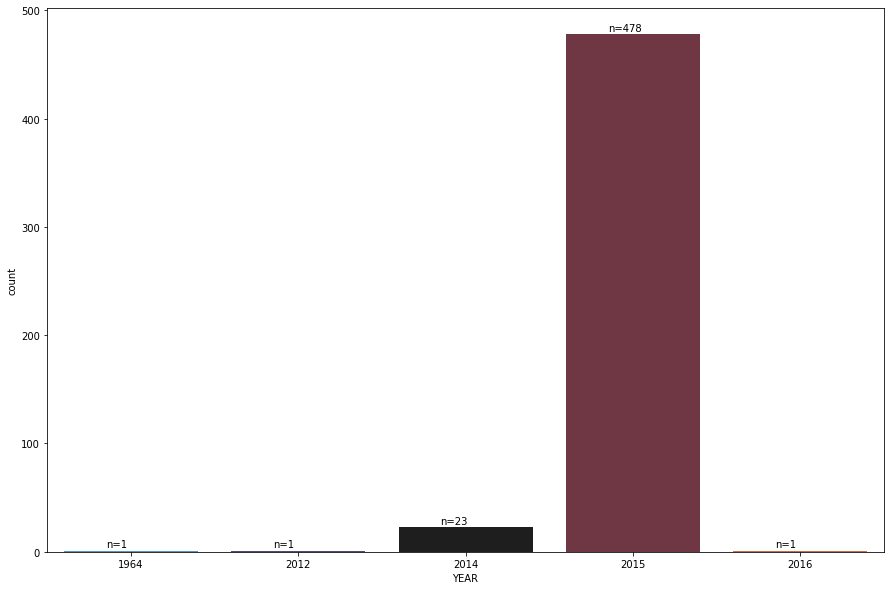

In [18]:
# Visualize the count of movie per year

plt.figure(figsize = (15,10))
ax = sns.countplot(x='YEAR',data = fandango, palette = "icefire")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ 0.25,height + 3, 'n=%.0f'%(height))

plt.show()

In [19]:
# Ten Movies with the highest number of votes

fandango.sort_values(by = 'VOTES', axis = 0, ascending = False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [20]:
# Number of Movies with Zero votes

fandango['VOTES'][fandango['VOTES'] == 0].count()

69

In [21]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [22]:
# Remove all movies with no review from the Dataframe
fan_reviewed = fandango[fandango['VOTES']>0]

In [23]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


In [24]:
type(fan_reviewed)

pandas.core.frame.DataFrame

Text(0, 0.5, 'DENSITY')

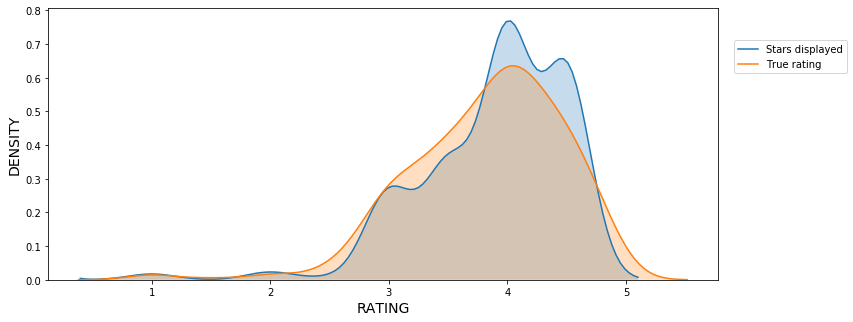

In [25]:
plt.figure(figsize = (12,5))
sns.kdeplot(fan_reviewed.STARS, clip =[0,5], label = 'Stars displayed', shade = True)
sns.kdeplot(fan_reviewed.RATING, clip =[0,5], label = 'True rating', shade = True)
plt.legend(loc='upper right', bbox_to_anchor=(0.7, 0., 0.5, 0.9))
plt.xlabel('RATING', fontsize = 14)
plt.ylabel('DENSITY', fontsize = 14)

### Create a new column of the difference between the STARS and RATING

In [26]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


### Create a plot to count the number times the differences occured.

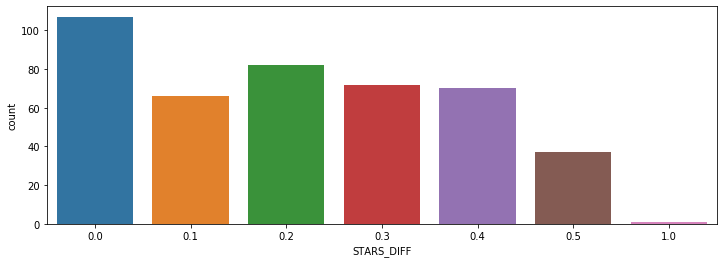

In [27]:
plt.figure(figsize = (12,4))
sns.countplot(data = fan_reviewed, x = 'STARS_DIFF')


In [28]:
difference = fan_reviewed.STARS_DIFF.value_counts()
difference

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: STARS_DIFF, dtype: int64

### What movie had 1 Star rating differential

In [29]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

- It's now time to compare Fandango to other rating site

In [30]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [31]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [32]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [33]:
all_sites.describe().T

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


 ## Scatterplot to find the correlation between RT critics review and RT users review

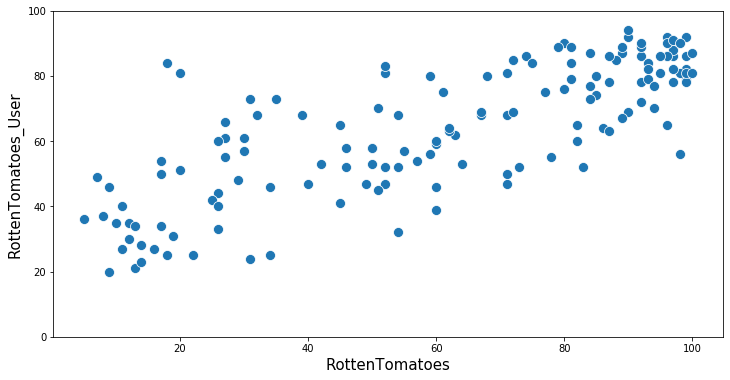

In [34]:
plt.figure(figsize =  (12,6))
sns.scatterplot(x = 'RottenTomatoes', y = "RottenTomatoes_User", data = all_sites, ci = 95, s = 100 )
plt.xlabel("RottenTomatoes", fontsize = 15)
plt.ylabel("RottenTomatoes_User", fontsize = 15)
plt.ylim(0,100)
plt.show()

In [35]:
all_sites['RT_DIFF'] = all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


- From the calculation shown on the RT_DIFF column, positive values imply that the critics rated higher than the users while negative values indicate that the Users rated higher than the critics. Zero value shows an agreement between the critics and the user rating

### Calculating the absolute mean value

In [36]:
all_sites['RT_DIFF'].apply(abs).mean()

15.095890410958905

## Distribution plot between RT Critics and RT Users rating

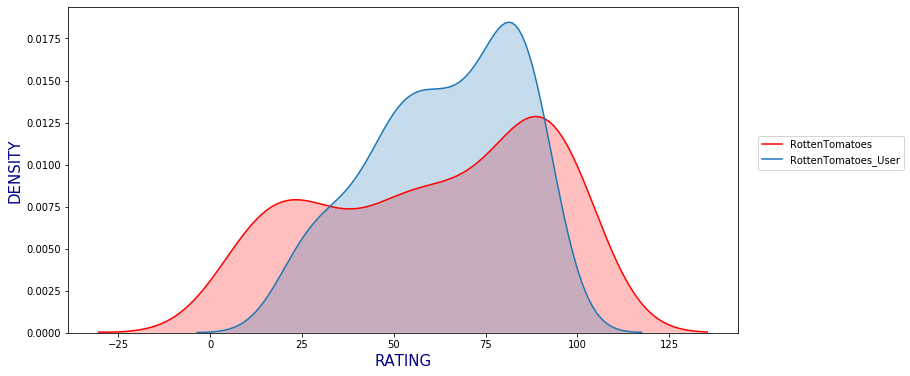

In [37]:
plt.figure(figsize = (12,6))
sns.kdeplot(all_sites.RottenTomatoes, color = 'Red', shade = True )
sns.kdeplot(all_sites.RottenTomatoes_User,  shade = True )
plt.xlabel('RATING', fontsize = 15, color = 'Darkblue') 
plt.ylabel('DENSITY', fontsize = 15, color = 'Darkblue')  
plt.legend(loc = (1.03, 0.5))
plt.show()

### Plot the difference between critics rating and users rating

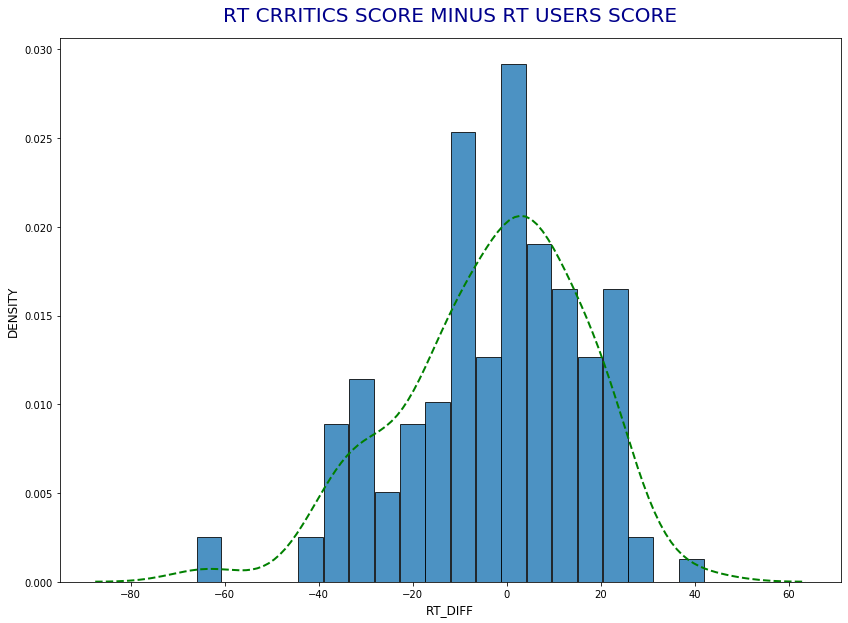

In [38]:
plt.figure(figsize = (14,10))
sns.distplot(all_sites.RT_DIFF,  bins = 20, norm_hist=False, kde = True,  hist_kws = {'lw': 1, 'rwidth' : 0.97, 'alpha':0.8, 'edgecolor': 'black'}, kde_kws = {'lw':2, 'ls': '--', 'color': 'green'})
plt.xlabel('RT_DIFF', fontsize = 12)
plt.ylabel('DENSITY', fontsize = 12)
plt.title('RT CRRITICS SCORE MINUS RT USERS SCORE', y = 1.02, fontsize = 20, color = 'Darkblue')
plt.show()

- The histogram plot shows the distribution of the difference between the RT Critics and the RT Users.


### Now create a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

In [39]:
all_sites['RT_DIFF'].apply(abs)

0      12
1       5
2      10
3      66
4      14
       ..
141     9
142    15
143    19
144    19
145    24
Name: RT_DIFF, Length: 146, dtype: int64

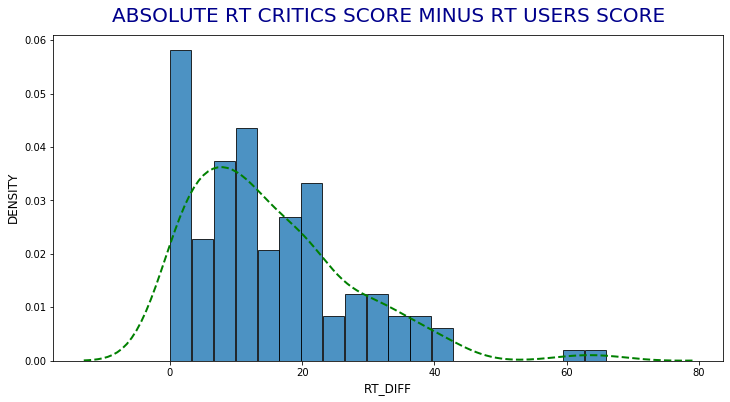

In [40]:
plt.figure(figsize = (12,6))
sns.distplot(all_sites['RT_DIFF'].apply(abs),  bins = 20, norm_hist=False, kde = True,  hist_kws = {'lw': 1, 'rwidth' : 0.97, 'alpha':0.8, 'edgecolor': 'black'}, kde_kws = {'lw':2, 'ls': '--', 'color': 'green'})
plt.xlabel('RT_DIFF', fontsize = 12)
plt.ylabel('DENSITY', fontsize = 12)
plt.title('ABSOLUTE RT CRITICS SCORE MINUS RT USERS SCORE', y = 1.02, fontsize = 20, color = 'Darkblue')
plt.show()

### What are the top 5 movies users rated higher than critics on average

In [41]:
all_sites[['FILM','RT_DIFF']].sort_values(by = 'RT_DIFF', ascending = True)[:5]

,FILM,RT_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


### Now show the top 5 movies critics scores higher than users on average.

In [42]:
all_sites[['FILM','RT_DIFF']].sort_values(by = 'RT_DIFF', ascending = False)[:5]

,FILM,RT_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritics
- Since metacritics have both the user rating and its official user rating, we would explore to know the correlation between these two ratings.

###  Create a Scatter Plot of MetaCritics rating and users rating

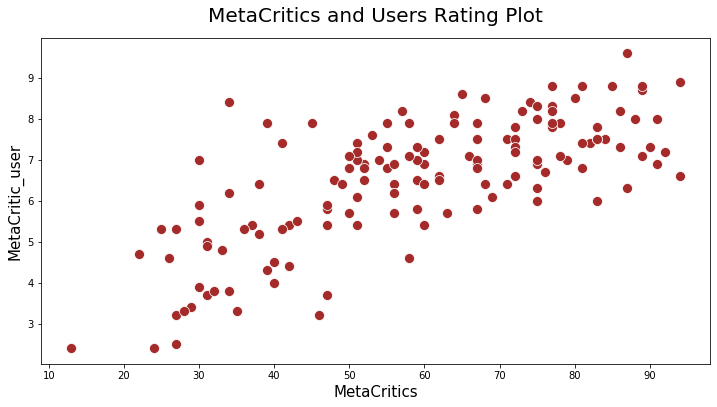

In [43]:
plt.figure(figsize =(12,6))
sns.scatterplot(x = all_sites.Metacritic, y = all_sites.Metacritic_User, data = all_sites, color = "brown",s = 100, ci = 95)
plt.xlabel('MetaCritics', fontsize = 15)
plt.ylabel('MetaCritic_user', fontsize = 15)
plt.title('MetaCritics and Users Rating Plot', fontsize = 20, y = 1.03)
plt.show()




## IMDB

-  Lets graphically display the correlation between vote counts by metacritics versus vote count by IMDB

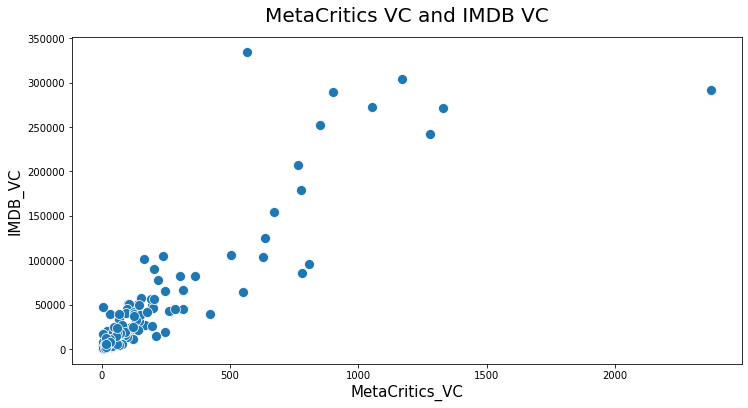

In [44]:
plt.figure(figsize =(12,6))
sns.scatterplot(x = all_sites.Metacritic_user_vote_count, y = all_sites.IMDB_user_vote_count, data = all_sites, s = 100, ci = 95)
plt.xlabel('MetaCritics_VC', fontsize = 15)
plt.ylabel('IMDB_VC', fontsize = 15)
plt.title('MetaCritics VC and IMDB VC', fontsize = 20, y = 1.03)
plt.show()

**We can spot two outliers from the plot, the highest vote count for IMDB has about 500 metacritics vote count while the higest MetaCritics_vote count has about 27,000 of IMDB vote count**

### What movie has the highest IMDB user vote count?

In [45]:
all_sites.nlargest(n = 1, columns = 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


### What movie has the highest Metacritic User Vote count?

In [46]:
all_sites.nlargest(n = 1, columns = 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandango Vs All_sites.

- Lets explore to know if fandango actually displayed and manipulated the rating in a bid to boost their ticket sales

In [47]:
df = pd.merge(fandango, all_sites, on = 'FILM', how = 'inner')

In [48]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [49]:
df.shape

(145, 13)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RT_DIFF                     145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [51]:
df['RT_Norm'] = df['RottenTomatoes']/ 20
df['RT_User_Norm'] = df['RottenTomatoes_User']/ 20
df['Metacritic_Norm'] = df['Metacritic']/ 20
df['Metacritic_User_Norm'] = df['Metacritic_User']/ 2
df['IMDB_Norm'] = df['IMDB']/ 2




In [52]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.90,4.50,4.70,4.45,4.30


### Create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table

In [53]:
df1 = df[['STARS','RATING','RT_Norm','RT_User_Norm','Metacritic_Norm','Metacritic_User_Norm','IMDB_Norm']]

In [54]:
df1.head()

,STARS,RATING,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,4.5,4.5,4.90,4.50,4.70,4.45,4.30


- The moment is here to find out the discrepancy in Fandango movie rating display. We are aware of the abnormalcy in the rating display, however, We want to find how significant their movie rating manipulation is.

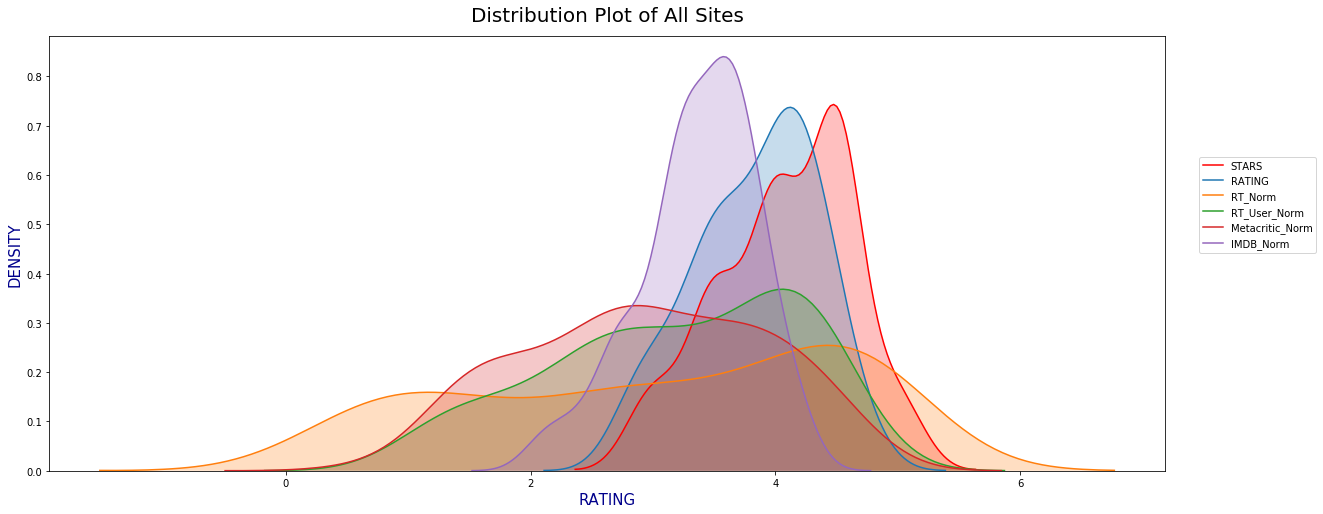

In [57]:
plt.figure(figsize = (20,8))
sns.kdeplot(df1.STARS, color = 'Red', shade = True )
sns.kdeplot(df1.RATING,  shade = True )
sns.kdeplot(df1.RT_Norm,  shade = True )
sns.kdeplot(df1.RT_User_Norm,  shade = True )
sns.kdeplot(df1.Metacritic_Norm,  shade = True )
sns.kdeplot(df1.IMDB_Norm, shade = True)
plt.xlabel('RATING', fontsize = 15, color = 'Darkblue') 
plt.ylabel('DENSITY', fontsize = 15, color = 'Darkblue')  
plt.legend(loc = (1.03, 0.5))
plt.title('Distribution Plot of All Sites', fontsize = 20, y = 1.02)
plt.show()

- From the plot, we can deduce that RT_Norm have the most uniform distribution while the fandango STARS have the most uneven distribution

#### Task
- We can now directly compare the RT_Norm rating and the Fandango STARS rating

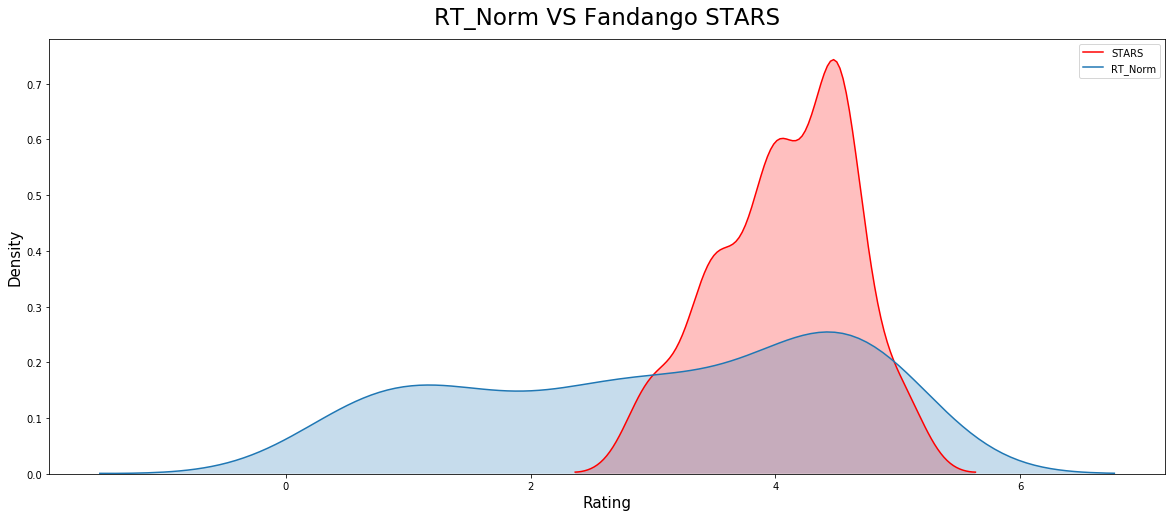

In [70]:
plt.figure(figsize = (20,8))
sns.kdeplot(df1.STARS, color = 'Red', shade = True )
sns.kdeplot(df1.RT_Norm,  shade = True)
plt.title('RT_Norm VS Fandango STARS', fontsize = 23, y = 1.02)
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show()

### Task: Create a clustermap visualization of all normalized scores

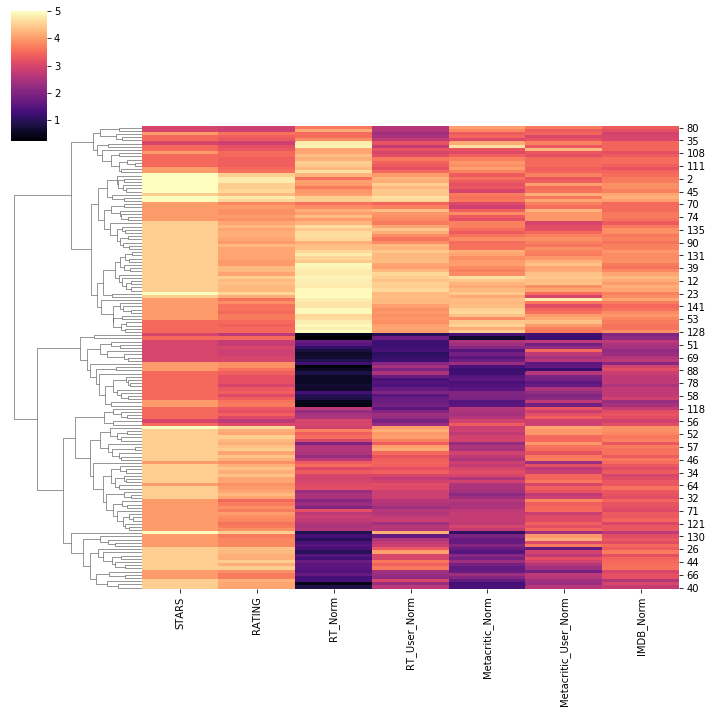

In [114]:
sns.clustermap(df1, col_cluster = False, cmap='magma')

- Fandango Movies has the highest rating, considering that they round up their rating to the nearest whole number. Also, RT_Norm had the lowest rating. So it is important to find out the least 10 movies with the lowest rating.

In [122]:
Norm_Film = df[['STARS','RATING','RT_Norm','RT_User_Norm','Metacritic_Norm','Metacritic_User_Norm','IMDB_Norm','FILM']]

In [124]:
Norm_Film.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RT_User_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.25,1.80,0.65,1.20,2.15,Paul Blart: Mall Cop 2 (2015)
84,4.0,3.9,0.35,2.45,1.40,1.65,2.95,Hitman: Agent 47 (2015)
54,4.0,3.7,0.40,1.85,1.55,1.85,2.45,Hot Pursuit (2015)
25,4.5,4.1,0.45,2.30,1.30,2.30,3.05,Taken 3 (2015)
28,3.0,2.7,0.45,1.00,1.35,1.25,2.00,Fantastic Four (2015)
50,4.0,3.6,0.50,1.75,1.50,2.75,2.30,The Boy Next Door (2015)
87,3.5,3.2,0.55,1.35,1.60,1.90,2.70,Unfinished Business (2015)
88,4.0,3.6,0.55,2.00,1.20,1.20,3.15,The Loft (2015)
77,3.5,3.2,0.60,1.75,1.50,1.95,2.75,Seventh Son (2015)
78,3.5,3.2,0.60,1.50,1.35,1.60,2.75,Mortdecai (2015)


Paul Blart: Mall Cop 2(2015) on Rotten Critics rating had the overall lowest rating. Although other rating site kind of followed a convention, however, the Fandango rating was purely unconventional.

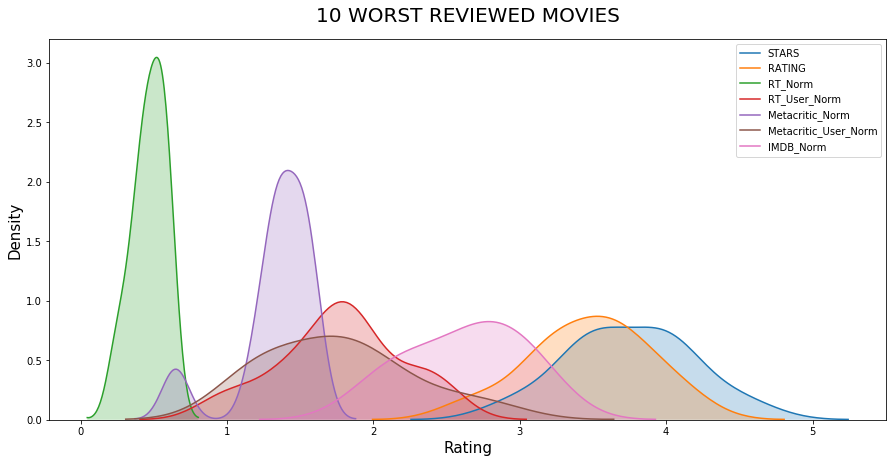

In [139]:
plt.figure(figsize = (15,7))
worst_film = Norm_Film.nsmallest(10,'RT_Norm').drop('FILM', axis = 1)
sns.kdeplot(worst_film['STARS'], shade = True)
sns.kdeplot(worst_film['RATING'], shade = True)
sns.kdeplot(worst_film['RT_Norm'], shade = True)
sns.kdeplot(worst_film['RT_User_Norm'], shade = True)
sns.kdeplot(worst_film['Metacritic_Norm'], shade = True)
sns.kdeplot(worst_film['Metacritic_User_Norm'], shade = True)
sns.kdeplot(worst_film['IMDB_Norm'], shade = True)
plt.title('10 WORST REVIEWED MOVIES',fontsize = 20, y = 1.03)
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.show()

- Final thoughts: This is ridiculous!!! Fandango truly displays manipulated rating to their users. This claims can be justified when Fandango displayed 4.5 for a movie that was poorly rated across all other sites.